In [1]:
# importing the necessary packages
import pdal
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point, mapping
import numpy as np
from pyproj import Proj, transform
import folium
import laspy as lp
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# importing packages and modules
import os, sys
sys.path.insert(0, '../scripts/')


In [3]:
# importing scripts
from package_test import test
object = test()

In [4]:
polygon2 = object.generate_polygon(object.coordinates, 4326)

In [5]:
# 3d map with folium
object.show_on_map(polygon2, 20, polygon2)

In [6]:
coor = object.loop_EPSG_converter(object.coordinates)
print(coor)
polygon = object.generate_polygon(coor, 4326)

[[-10436876.301386151, 5148721.349314567], [-10436887.43333523, 5148736.309605352], [-10436914.26133251, 5148775.206471106], [-10436865.169437071, 5148749.025870951], [-10436847.358318545, 5148704.145009145]]


In [7]:
location = "../data/test_pipeline.json"
url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public"
region = "IA_FullState"
in_srs = 3857
out_srs = 4326

request = object.modify_pipe_json(location, url, region, in_srs, out_srs, polygon)

{'pipeline': [{'polygon': 'POLYGON ((-10436876.301386151 5148721.349314567, -10436887.43333523 5148736.309605352, -10436914.26133251 5148775.206471106, -10436865.169437071 5148749.025870951, -10436847.358318545 5148704.145009145, -10436876.301386151 5148721.349314567))', 'filename': 'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json', 'type': 'readers.ept', 'tag': 'readdata'}, {'type': 'filters.range', 'limits': 'Classification![7:7]', 'tag': 'no_noise'}, {'in_srs': 'EPSG:3857', 'out_srs': 'EPSG:4326', 'tag': 'reprojectUTM', 'type': 'filters.reprojection'}, {'filename': 'iowa.csv', 'tag': 'writerscsv', 'type': 'writers.text'}, {'filename': 'iowa.las', 'tag': 'writersply', 'type': 'writers.las'}]}


In [8]:
pipe = pdal.Pipeline(json.dumps(request))

In [9]:
pipe.execute()

1371

In [10]:
df = object.generate_geo_df(pipe, 4326) 
df.head(20)

,elevation,geometry
0,310.31,POINT (-93.75582 41.91801)
1,310.39,POINT (-93.75581 41.91801)
2,310.53,POINT (-93.75582 41.91801)
3,310.27,POINT (-93.75585 41.91803)
4,310.40,POINT (-93.75584 41.91803)
5,310.36,POINT (-93.75583 41.91803)
6,310.42,POINT (-93.75581 41.91803)
7,310.34,POINT (-93.75588 41.91804)
8,310.32,POINT (-93.75586 41.91804)
9,310.35,POINT (-93.75583 41.91804)


Text(88.875, 0.5, 'Latitude')

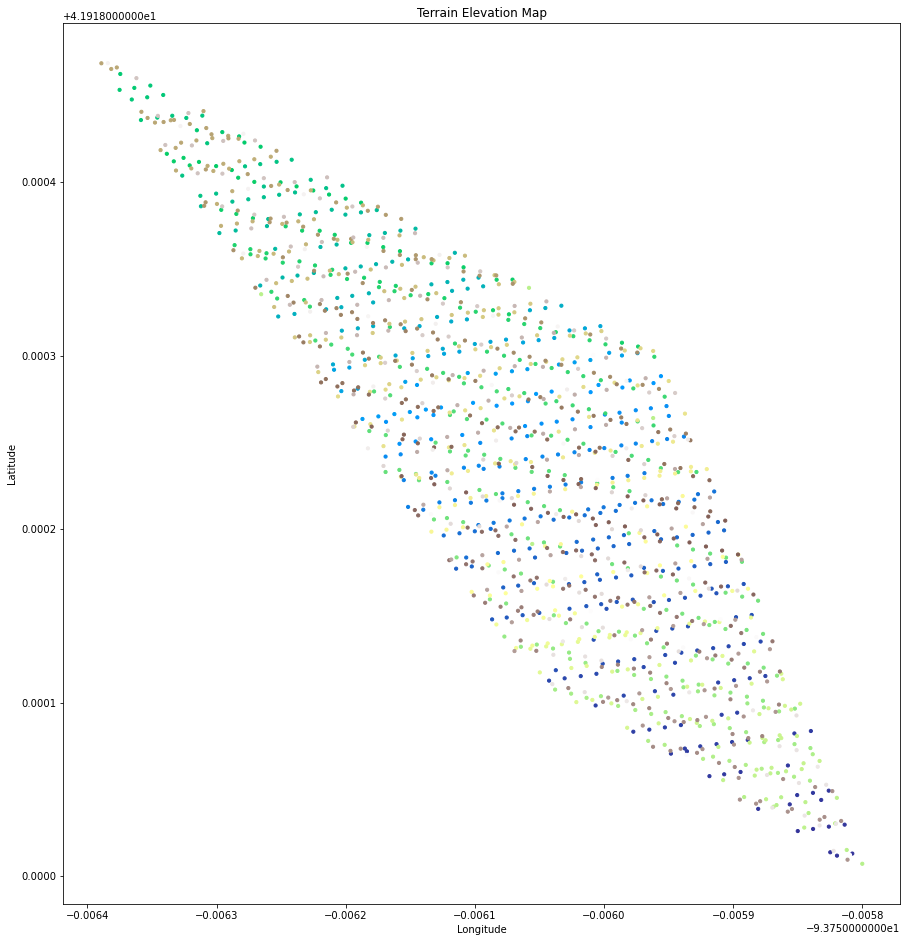

In [11]:
df.plot(c='elevation', scheme="quantiles", cmap='terrain', legend=True,
                                  markersize=10,
                                  figsize=(15, 20),
                                  missing_kwds={
                                    "color": "violet",
                                    "edgecolor": "red",
                                    "hatch": "///",
                                    "label": "Missing values"}
                                  )

plt.title('Terrain Elevation Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

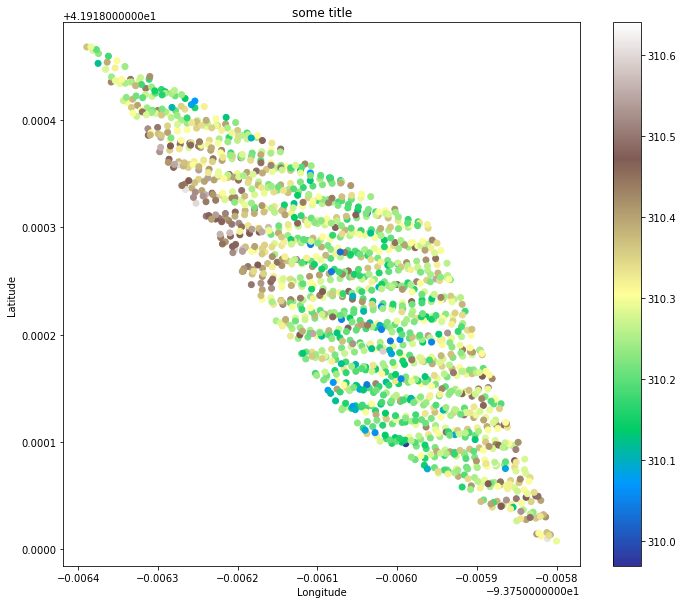

In [12]:
object.plot_heatmap(df, "some title")

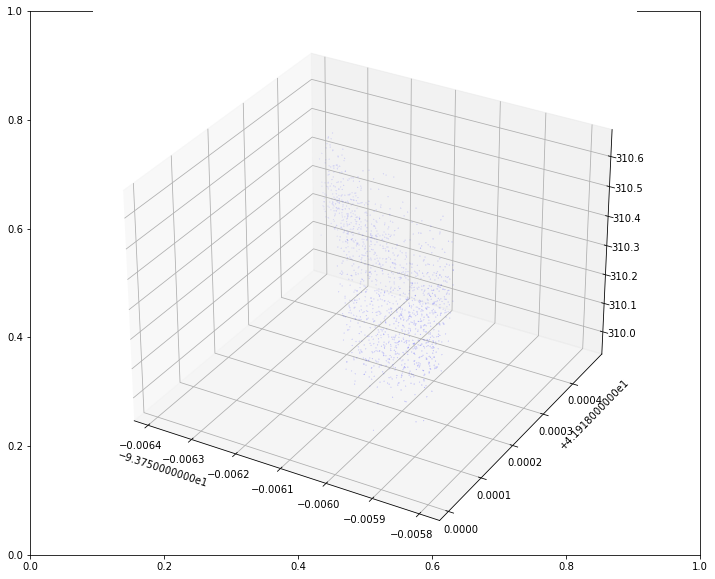

In [13]:
object.get_3D_visualzation(df)